In [3]:
import matplotlib
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pickle
import os
import sys
sys.path.append("/home/stella/nova/predictions")
import io
#from nova.visualization.cnn_filters import *
#from nova.preprocessed_data import get_weights
#import seaborn as sns
%matplotlib inline

In [4]:
sys.path.insert(0, os.path.abspath('../'))
print(sys.path)
from visualization import *

['/home/houyh/nova', '/home/houyh/nova/pytorch_version', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/home/houyh/.local/lib/python3.10/site-packages', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages/IPython/extensions', '/home/houyh/.ipython', '/home/stella/nova/predictions']


# NuE

In [ ]:
# load the NuE predictions
path1 = "/home/houyh/nova/pytorch_version/pkl_file/resnet_predictions.pkl"
with open(path1, 'rb') as f:
    nue_wei_resnet = pickle.load(f)

path2 = "/home/houyh/nova/pytorch_version/pkl_file/googlenet_predictions.pkl"
with open(path2, 'rb') as f:
    nue_wei_google = pickle.load(f)

path3 = "/home/houyh/nova/pytorch_version/pkl_file/mobilenet_predictions.pkl"
with open(path3, 'rb') as f:
    nue_wei_mobile = pickle.load(f)

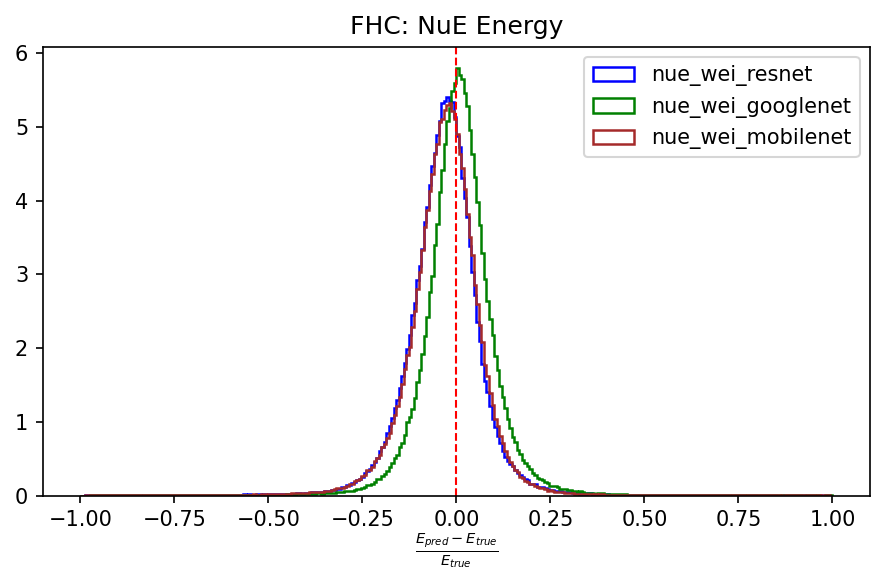

In [ ]:
from scipy.stats import norm

bins_n = 300

fig, axes = plt.subplots(dpi=150)

resnet_data = nue_wei_resnet['resolution'] - 1.
google_data = nue_wei_google['resolution'] - 1.
mobile_data = nue_wei_mobile['resolution']-1.

axes.hist(resnet_data, bins=bins_n, density=True, range=(-1,1), histtype='step', color='b', label='nue_wei_resnet', linewidth=1.2)

axes.hist(google_data, bins=bins_n, density=True, range=(-1,1), histtype='step', color='green', label='nue_wei_googlenet', linewidth=1.2)

axes.hist(mobile_data, bins=bins_n, density=True, range=(-1,1), histtype='step', color='brown', label='nue_wei_mobilenet', linewidth=1.2)

resnet_center = resnet_data.mean()
google_center = google_data.mean()
mobile_center = mobile_data.mean()
# axes.axvline(resnet_center, color='blue', linestyle='--', linewidth=1, label=f'ResNet Center ({resnet_center:.3f})')
# axes.axvline(google_center, color='green', linestyle='--', linewidth=1, label=f'GoogleNet Center ({google_center:.3f})')

axes.axvline(0, color='red', linestyle='--', linewidth=1)

# axes.hist(nue_wei_mobile['resolution']-1., bins=bins_n, density=True, range=(-1,1), histtype='step', color='brown', label='nue_wei_mobilenet', linewidth=1.2)

axes.legend()
axes.set_title("FHC: NuE Energy")
axes.set_xlabel(r'$\frac{E_{pred}-E_{true}}{E_{true}}$', labelpad=0)
plt.tight_layout()


/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/lib/python3/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/lib/python3/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3/dist-package

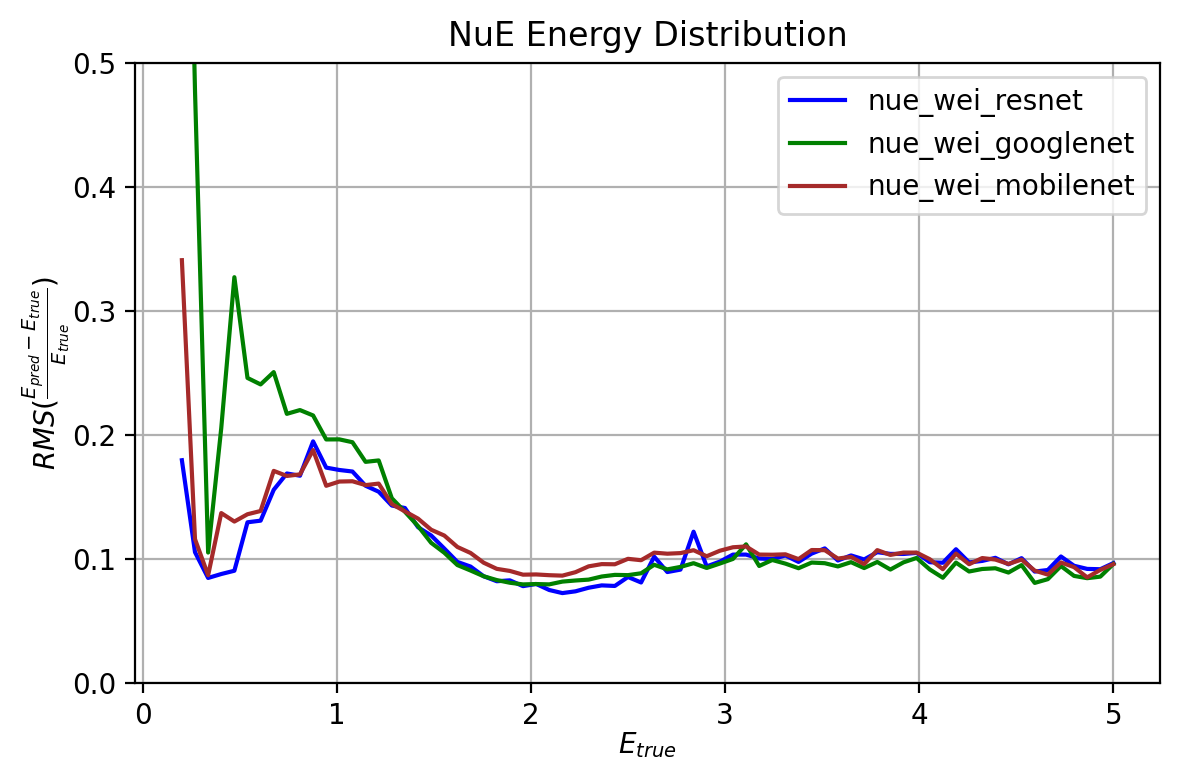

In [8]:
fig, ax = plt.subplots(dpi=200)


n1 = nue_wei_resnet['y'].shape
nue_wei_resnet['y'].reshape(n1)
nue_wei_resnet['yhat'].reshape(n1)

n2 = nue_wei_google['y'].shape
nue_wei_google['y'].reshape(n2)
nue_wei_google['yhat'].reshape(n2)

n3 = nue_wei_mobile['y'].shape
nue_wei_mobile['y'].reshape(n3)
nue_wei_mobile['yhat'].reshape(n3)

res = 75
ys = np.linspace(0, 5, res)

def resolution_errbars(y, yhat, ax, name, fmt=None, alpha=1):
    fulls = [[] for i in range(res)]
    for i, yp in enumerate(y):
        idx = int(yp / (5.0 / res))
        if idx > res - 1:
            continue
        fulls[idx].append((yhat[i] - yp) / yp)
    avs = [np.mean(el) for el in fulls]
    ers = [np.std(el) for el in fulls]
    if fmt == None:
        ax.plot(ys, ers, label=name, ms=10, alpha=alpha)
    else:
        ax.plot(ys, ers, fmt, label=name, ms=10, alpha=alpha)
    

resolution_errbars(nue_wei_resnet['y'], nue_wei_resnet['yhat'], ax, name='nue_wei_resnet', fmt='b')
resolution_errbars(nue_wei_google['y'], nue_wei_google['yhat'], ax, name='nue_wei_googlenet', fmt='g') 
resolution_errbars(nue_wei_mobile['y'], nue_wei_mobile['yhat'], ax, name='nue_wei_mobilenet', fmt='brown')

ax.legend()
ax.set_title("NuE Energy Distribution")
ax.set_xlabel(r'$E_{true}$', fontsize=10, labelpad=0)
ax.set_ylabel(r'$RMS( \frac{E_{pred} - E_{true}}{E_{true}} )$', fontsize=10, labelpad=0)

ax.set_ylim([0, 0.50])
ax.grid()
plt.tight_layout()
plt.show()


## Electron

In [ ]:
# load the Electron predictions
path1 = "/home/houyh/nova/pytorch_version/pkl_file/resnet_predictions.pkl"
with open(path1, 'rb') as f:
    nue_wei_resnet = pickle.load(f)

path2 = "/home/houyh/nova/pytorch_version/pkl_file/googlenet_predictions.pkl"
with open(path2, 'rb') as f:
    nue_wei_google = pickle.load(f)

path3 = "/home/houyh/nova/pytorch_version/pkl_file/mobilenet_predictions.pkl"
with open(path3, 'rb') as f:
    nue_wei_mobile = pickle.load(f)

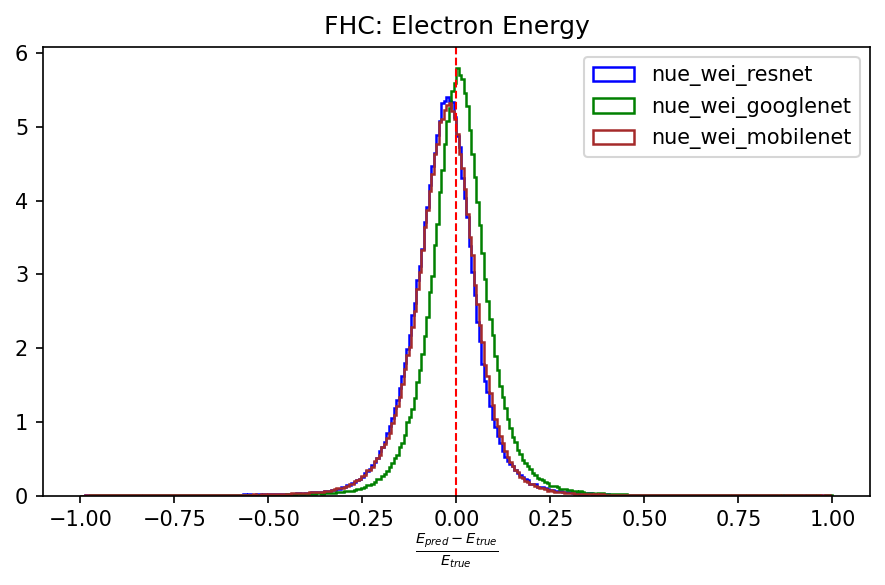

In [11]:
from scipy.stats import norm

bins_n = 300

fig, axes = plt.subplots(dpi=150)

resnet_data = nue_wei_resnet['resolution'] - 1.
google_data = nue_wei_google['resolution'] - 1.
mobile_data = nue_wei_mobile['resolution']-1.

axes.hist(resnet_data, bins=bins_n, density=True, range=(-1,1), histtype='step', color='b', label='nue_wei_resnet', linewidth=1.2)

axes.hist(google_data, bins=bins_n, density=True, range=(-1,1), histtype='step', color='green', label='nue_wei_googlenet', linewidth=1.2)

axes.hist(mobile_data, bins=bins_n, density=True, range=(-1,1), histtype='step', color='brown', label='nue_wei_mobilenet', linewidth=1.2)

resnet_center = resnet_data.mean()
google_center = google_data.mean()
mobile_center = mobile_data.mean()
# axes.axvline(resnet_center, color='blue', linestyle='--', linewidth=1, label=f'ResNet Center ({resnet_center:.3f})')
# axes.axvline(google_center, color='green', linestyle='--', linewidth=1, label=f'GoogleNet Center ({google_center:.3f})')

axes.axvline(0, color='red', linestyle='--', linewidth=1)

# axes.hist(nue_wei_mobile['resolution']-1., bins=bins_n, density=True, range=(-1,1), histtype='step', color='brown', label='nue_wei_mobilenet', linewidth=1.2)

axes.legend()
axes.set_title("FHC: Electron Energy")
axes.set_xlabel(r'$\frac{E_{pred}-E_{true}}{E_{true}}$', labelpad=0)
plt.tight_layout()


/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/lib/python3/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/lib/python3/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3/dist-package

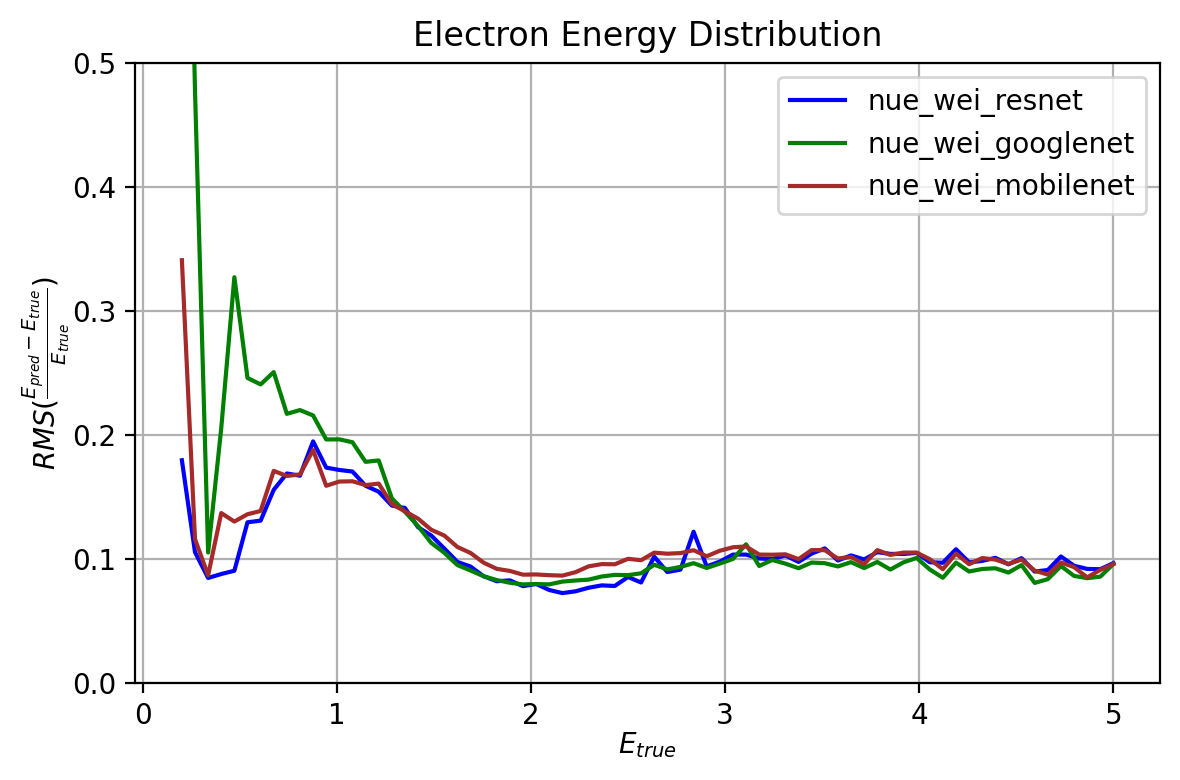

In [10]:
fig, ax = plt.subplots(dpi=200)


n1 = nue_wei_resnet['y'].shape
nue_wei_resnet['y'].reshape(n1)
nue_wei_resnet['yhat'].reshape(n1)

n2 = nue_wei_google['y'].shape
nue_wei_google['y'].reshape(n2)
nue_wei_google['yhat'].reshape(n2)

n3 = nue_wei_mobile['y'].shape
nue_wei_mobile['y'].reshape(n3)
nue_wei_mobile['yhat'].reshape(n3)

res = 75
ys = np.linspace(0, 5, res)

def resolution_errbars(y, yhat, ax, name, fmt=None, alpha=1):
    fulls = [[] for i in range(res)]
    for i, yp in enumerate(y):
        idx = int(yp / (5.0 / res))
        if idx > res - 1:
            continue
        fulls[idx].append((yhat[i] - yp) / yp)
    avs = [np.mean(el) for el in fulls]
    ers = [np.std(el) for el in fulls]
    if fmt == None:
        ax.plot(ys, ers, label=name, ms=10, alpha=alpha)
    else:
        ax.plot(ys, ers, fmt, label=name, ms=10, alpha=alpha)
    

resolution_errbars(nue_wei_resnet['y'], nue_wei_resnet['yhat'], ax, name='nue_wei_resnet', fmt='b')
resolution_errbars(nue_wei_google['y'], nue_wei_google['yhat'], ax, name='nue_wei_googlenet', fmt='g') 
resolution_errbars(nue_wei_mobile['y'], nue_wei_mobile['yhat'], ax, name='nue_wei_mobilenet', fmt='brown')

ax.legend()
ax.set_title("Electron Energy Distribution")
ax.set_xlabel(r'$E_{true}$', fontsize=10, labelpad=0)
ax.set_ylabel(r'$RMS( \frac{E_{pred} - E_{true}}{E_{true}} )$', fontsize=10, labelpad=0)

ax.set_ylim([0, 0.50])
ax.grid()
plt.tight_layout()
plt.show()
